<a href="https://colab.research.google.com/github/Leomconti/data_science/blob/main/airbnb_data_analysis_toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by Leonardo Mosimann Conti

* [github](https://github.com/Leomconti)

* [linkedin](https://www.linkedin.com/in/leomconti/)

* [medium](https://medium.com/@leomconti)

---
# <center>Airbnb Data Analysis - *Toronto*</center>#

![picture](https://css1.www.cntower.ca/site_Files/Content/IMG/2020/Night_1024x380.jpg)*Copyright: Rob Nelson Photography*

[Airbnb](https://www.airbnb.com) is considered the **biggest hotel franchise** in the world. And all of this without having a **single owned property**. 

Making contact between people who want to travel (and stay somewhere) with house hosts who want to rent their places in a pratical manner. Airbnb provides an **innovating platform** in order to make this work.

By the end of 2018, 10 years after its foundation, it had already hosted **over 300 million** people all over the world, challenging traditinal hotel companies.

One of Airbnb initiatives is to provide the sites data for some of the main cities in the world. Through the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), people are able to download a great amount of data to develop *Data Science* projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this notebook we'll be analyzing the data refering to the city of Toronto, and see which insights can be extracted from the raw data provided.**

##1. Loading libraries and data

###1.1 Loading libraries

* `pandas` - Used for dataset manipulation
* `matplotilib` - Used to plot histograms
* `seaborn` - Used for heatmaps
* ` ploty` - Used for interactive maps

In [ ]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

###1.2 Loading the data from Inside Airbnb

In [ ]:
#import the file listings.csv to a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv')

##2. Data Analysis

**Variable Dictionary**
* `id` - id number generated to identify the property
* `name` - name of the advertised property
* `host_id` - property's host id
* `host_name` - hosts name
* `neighbourhood_group` - this column presents no valid data
* `neighbourhood` - neighbourhood name
* `latitude` - property's latitude coordinate
* `longitude` - property's longitude coordinate
* `room_type` - offered room type for the property
* `price` - price for each night rented
* `minimum_nights` - minimum nights to be rented
* `number_of_reviews` - number of reviews each property has
* `last_review` - last review date
* `reviews_per_month` - ammount of reviews each month
* `calculated_host_listings_count` - the ammount of properties the host owns
* `availability_365` - number of days the property is available in a year


Before any analysis, let's have a look on the dataset, analysising the 5 first entries.

In [ ]:
#show 5 first entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0


###2.1 How many variables and entries our dataset has? What are the variable types?

In [ ]:
# identify the data volume of the DataFrame
print(f'Entries: \t {df.shape[0]}')
print(f'Variables: \t {df.shape[1]}')
# verify types of variables from the dataset
display(df.dtypes)

Entries: 	 18265
Variables: 	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###2.2 What's the percentage of the missing values on the dataset?

To enhance the dataset's quality, it's vital to identify null values and understand if they are significant when approaching the total of entries.

* It's possible to see that the variable `neighbourhood_group` has 100% of its values null.

* The variables `reviews_per_month` and `last_review` have missing values close to 1/4 of the lines.

* The variables `host_name` and `name` have less than 0,1% of its values missing.

In [ ]:
# sort the variables in descending order by their missing values
all_data = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Data (%)' : round(all_data, 2)}) 
display(missing_data)

,Missing Data (%)
neighbourhood_group,100.00
reviews_per_month,22.47
last_review,22.47
host_name,0.06
name,0.01
availability_365,0.00
calculated_host_listings_count,0.00
number_of_reviews,0.00
minimum_nights,0.00
price,0.00


###2.3 How are the varialbes distributed?

To identify the variable distributions will be plotted histograms.

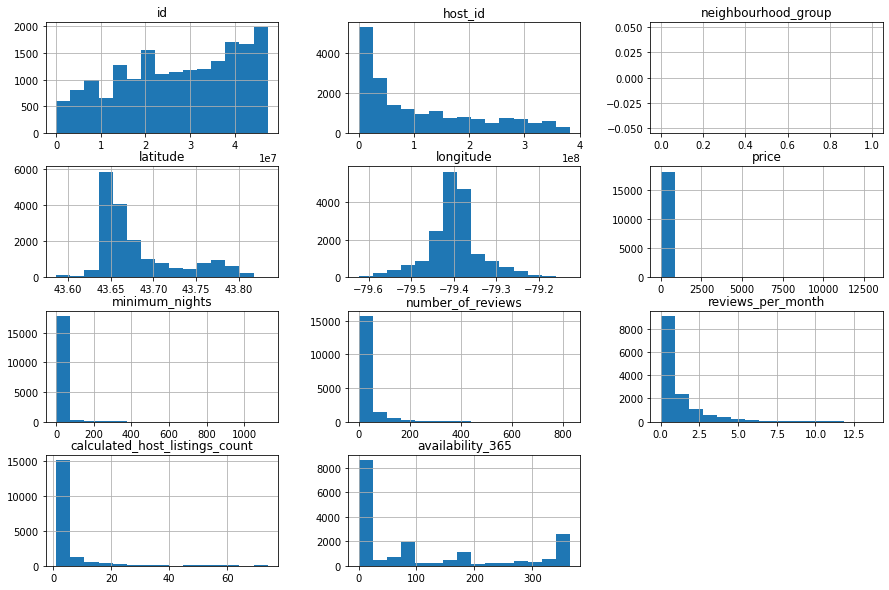

In [ ]:
# plot a histogram of the numeric variables
df.hist(bins = 15, figsize = (15, 10));

###2.4 Are there any outliers?

From the histogram distribution, it's possible to identify hints of probable outliers. For example, in the variables `price`, `minimum_nights`, and `calculated_host_listing_counts`.

Outliers distort most of the graphical representation and don't follow a proper distribution. For confirmation, two fast ways assist in the detection of outliers, being them:

* Statistic summary using the method `describe()`.
* Plot `boxplots` for the variable.

In [ ]:
# statistic summary of the numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18265.000000,18265.000000,18265.000000,14160.000000,18265.000000,18265.000000
mean,137.659677,13.482617,26.021243,1.095512,4.718478,111.429565
std,306.423241,38.038305,53.033309,1.496456,9.629260,136.522538
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,95.000000,2.000000,5.000000,0.510000,1.000000,52.000000
75%,149.000000,20.000000,26.000000,1.380000,3.000000,180.000000
max,13000.000000,1125.000000,828.000000,13.660000,74.000000,365.000000


By looking at the statistic summary that the method `describe()` provided, we can confirm hypotheses such as:

* The variable `price` has 75% of its values below CAD149, though its maximum value is CAD13000.
* Some data in the `minimum_nights` variable, led its maximum above the 365 days of the year, being over three years in the property.

#### `minimum_nights` Boxplot

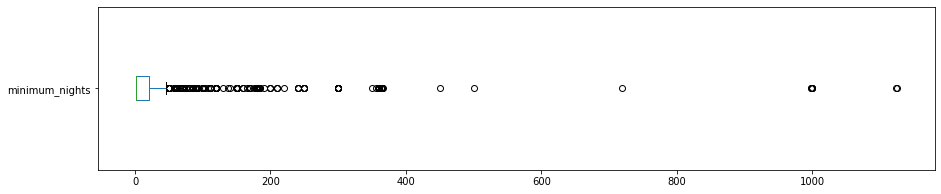

minimum_nights - Values above 30:
704 entries
3.8544%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# ammount of values above 30 days for minimum_nights
print('minimum_nights - Values above 30:')
print(f'{len(df[df.minimum_nights > 30])} entries')
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100 ))

####`price` Boxplot

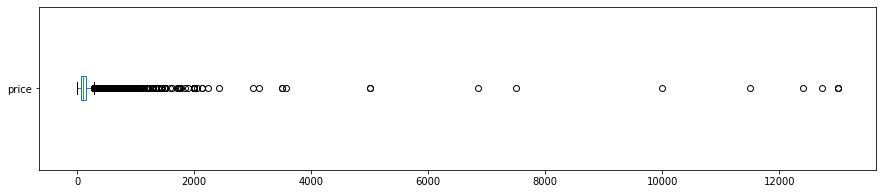

price - Values above 300:
960 entries
5.2560%


In [ ]:
#price 
df.price.plot(kind = 'box', vert = False, figsize  = (15,3))
plt.show()

# ammount of values above 300
print('price - Values above 300:')
print(f'{len(df[df.price > 300])} entries')
print('{:.4f}%'.format((len(df[df.price > 300]) / df.shape[0])*100 ))

####Histogram without outliers

Now that the outliers in the variables `price` and `minimum_nights` were identified, lets clean the DataFrame and plot the histogram one more time.

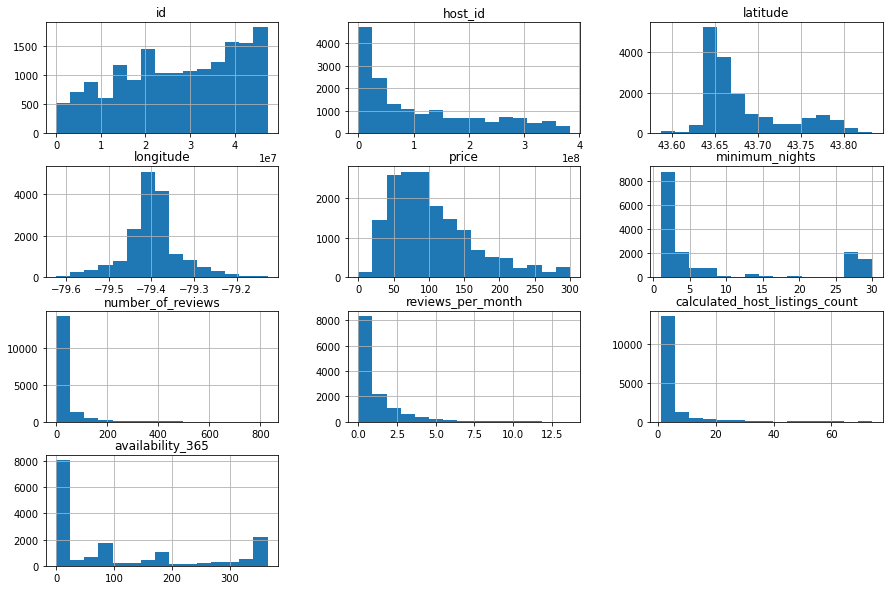

In [ ]:
#remove outliers in a new dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis = 0, inplace = True )
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis = 0, inplace = True)

#remove neighbourhood_group, because it's missing 100% of its values
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#plot a histogram for the numeric variables
df_clean.hist(bins = 15, figsize = (15,10));

###2.5 What's the correlation existent between the variables?

Correlation means that there's a relation between two or more things. In this context, we're looking for a similarity or connection between the variables.

This correlation can be measured and, the correlation coefficient should establish the intensity of it. To identify these connections between variables of interest we'll:

* Create a correlation matrix.
* Generate a *heatmap* from this matrix, using the `seaborn` library.


In [ ]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.034419,0.005671,0.007162,0.021588,-0.000994
minimum_nights,-0.034419,1.000000,0.007928,-0.034883,0.108335,0.176116
number_of_reviews,0.005671,0.007928,1.000000,0.787692,-0.051573,0.068620
reviews_per_month,0.007162,-0.034883,0.787692,1.000000,-0.018712,0.070340
calculated_host_listings_count,0.021588,0.108335,-0.051573,-0.018712,1.000000,0.167235
availability_365,-0.000994,0.176116,0.068620,0.070340,0.167235,1.000000


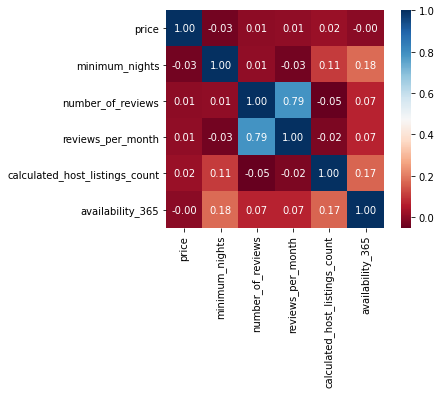

In [ ]:
# plot a heatmap from the correlations
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

### 2.6 What's the average renting price?

* From the operation below, it verifies that the mean price of the rental night of an Airbnb in Toronto is CAD103,16

In [ ]:
# look at the mean of the price column
df_clean.price.mean()

103.15963963963964

###2.7 Whats the most rented room type in Airbnb?

In [ ]:
#show the amount of each room available
df_clean.room_type.value_counts()

Entire home/apt    10158
Private room        6133
Shared room          301
Hotel room            58
Name: room_type, dtype: int64

In [ ]:
# percentage of each room available
room_data = df_clean.room_type.value_counts() / df_clean.shape[0] *100 

display(pd.DataFrame({'Rooms available (%)' : round(room_data, 2)})) 

,Rooms available (%)
Entire home/apt,61.01
Private room,36.83
Shared room,1.81
Hotel room,0.35


* Above we can see that over **60%** of the rooms rented are **entire home/apt**, following by **private rooms**, with a percentage close to **37%**.

###2.8 Whats the most expensive neighbourhood to rent an Airbnb in Toronto?

In [ ]:
# sort neighbourhoods by the average price
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False) [:10]

neighbourhood
Waterfront Communities-The Island    137.870516
Niagara                              128.228358
Rosedale-Moore Park                  124.959184
Bay Street Corridor                  124.008439
Casa Loma                            121.032787
Runnymede-Bloor West Village         120.764706
The Beaches                          119.401515
Woodbine Corridor                    115.909091
Greenwood-Coxwell                    115.313043
Church-Yonge Corridor                115.052158
Name: price, dtype: float64

In [ ]:
# verify if there's a significant ammount of data that support the average price for the neighbourhood
print(df_clean[df_clean.neighbourhood == 'Waterfront Communities-The Island'].shape)

(2788, 15)


#### Map including all properties from the clean dataset, sorted by price

In [ ]:
#plot the map

fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", color =  'price', title = ('Toronto Airbnb Properties'),
                        color_continuous_scale=px.colors.sequential.Jet, height = 600, zoom = 9.7, hover_name = 'name')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":80,"t":80,"l":80,"b":80})
fig.show()

##3. Conclusions

The superficial exploratory analysis done in the Airbnb database highlighted some interesting data that allowed us to go further into the Airbnb listings in Toronto. Going through the data, conclusions were reached such as:

* With the map plotted, it's evident that the area near **Old Toronto** is the most crowded in properties. And the closer to **downtown** the more **expensive** the rentals get.

* The Waterfront Communities-The Island has the highest price for rentals, mostly because of its water view, coasting Lake Ontario.

* Therefore the data had outliers, they were surpassed and after cleaning the data, we could interpret better the histograms and maps plotted.

* There aren't many correlations in between the variables, the only significant one being on `number_of_reviews` and `reviews_per_month`.

For further analysis and greater insights, it's recommended that the complete data is used, with all the 106 attributes available. All can be found at the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Consider having a look at my other projects and articles 

* [github](https://github.com/Leomconti)

* [linkedin](https://www.linkedin.com/in/leomconti/)

* [medium](https://medium.com/@leomconti)

Leonardo Mosimann Conti